# MNIST Digits Classification Dataset

In [1]:
from keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (60000, 28, 28)
X_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


In [3]:
# Keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # To perform one-hot encoding (Build dummy columns with the easiest way)

# Flattening the images from the 28 * 28 pixels to 1 Dimensional 784 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [4]:
# Normalizing the data to help with the training

X_train /= 255
X_test /= 255

In [5]:
# One hot encoding

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [6]:
# Option 1: Use initializers and regularizers

from keras import initializers
from keras import regularizers

# Option 2: Use Dropout with early stopping
from keras.layers import Dropout

# Option 3: Use EarlyStopping
from keras.callbacks import EarlyStopping

In [7]:
# Form NN
# Building a linear stack of layers with the sequential model

L1=100
L2=100
L3=100

model = Sequential()
# model.add(Dense(L1, input_dim=784,activation='relu')) # Original
# model.add(Dense(L1, input_dim=784,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01))) # Option 1
model.add(Dense(L2, activation='relu'))
model.add(Dense(L3, activation='relu'))
# model.add(Dropout(rate=0.2)) # Option 2


# Output layer (Softmax = multi nominal)
model.add(Dense(10, activation='softmax'))


In [8]:
# Compile the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
 # Training the model for 10 epochs

early_monitoring_monitor = EarlyStopping(patience=3) # Option 3

# history = model.fit(X_train,Y_train,epochs=10,batch_size=100,validation_data=(X_test,Y_test))
history = model.fit(X_train,Y_train,epochs=30,batch_size=100,validation_data=(X_test,Y_test),callbacks=[early_monitoring_monitor]) # Option 3 with increased epochs

Epoch 1/30
600/600 [==============================] - 4s 5ms/step - loss: 0.3189 - accuracy: 0.9111 - val_loss: 0.1629 - val_accuracy: 0.9497
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1354 - accuracy: 0.9596 - val_loss: 0.1132 - val_accuracy: 0.9648
Epoch 3/30
600/600 [==============================] - 5s 9ms/step - loss: 0.0940 - accuracy: 0.9716 - val_loss: 0.0928 - val_accuracy: 0.9703
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0878 - val_accuracy: 0.9726
Epoch 5/30
600/600 [==============================] - 4s 7ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0845 - val_accuracy: 0.9733
Epoch 6/30
600/600 [==============================] - 6s 10ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0814 - val_accuracy: 0.9761
Epoch 7/30
600/600 [==============================] - 3s 4ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0881 - val_accuracy: 0.9729
Epoch

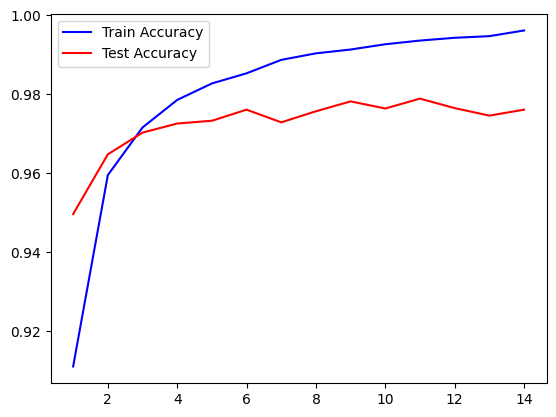

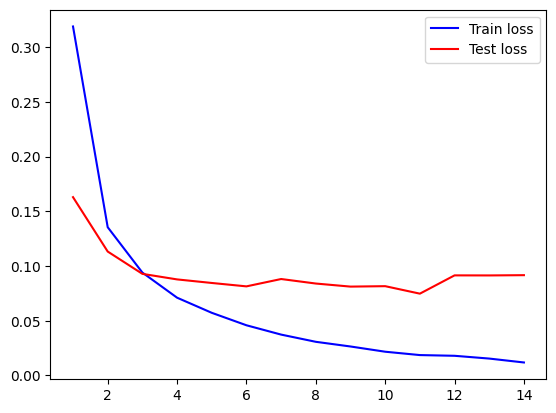

In [10]:
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()

# Grid Search Hyperparameters

In [11]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [13]:
# Function to create model, required for KerasClassifier

def create_model():
  # Create model
  model5 = Sequential()
  model5.add(Dense(200,input_dim=784,activation='relu'))
  model5.add(Dense(100,activation='relu'))
  model5.add(Dense(50,activation='relu'))
  model5.add(Dense(10,activation='softmax'))
  
  # Compile the model
  model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model5

# Tune the batch size and epochs

In [15]:
# Create model (15 minutes)
model5 = KerasClassifier(model=create_model,verbose=0)

# Define the grid search parameters
batch_size = [100,128]
epochs = [10,15,20]
param_grid= dict(batch_size=batch_size,epochs=epochs)
# n_jobs = CPU processing. if -1 means it will use all CPUs.
# cv=cross validation, times of cross validations
grid = GridSearchCV(estimator=model5,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X_train,Y_train)

In [22]:
# Summarize the results

print('Best %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with %r' % (mean, stdev, param))

Best 0.973917 using {'batch_size': 100, 'epochs': 20}
0.972767 (0.001360) with {'batch_size': 100, 'epochs': 10}
0.972117 (0.002151) with {'batch_size': 100, 'epochs': 15}
0.973917 (0.000440) with {'batch_size': 100, 'epochs': 20}
0.970267 (0.002381) with {'batch_size': 128, 'epochs': 10}
0.971650 (0.002531) with {'batch_size': 128, 'epochs': 15}
0.972733 (0.001899) with {'batch_size': 128, 'epochs': 20}


# Tune the training Optimization Algorithm (Only)

In [23]:
# Create the model (15 minutes)

model6 = KerasClassifier(model=create_model,loss='categorical_crossentropy',epochs=20,batch_size=128,verbose=0)

# Define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam','Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model6,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X_train,Y_train)

In [24]:
# Summarize the results

print('Best %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with %r' % (mean, stdev, param))

Best 0.973167 using {'optimizer': 'Nadam'}
0.972767 (0.002504) with {'optimizer': 'SGD'}
0.971450 (0.001619) with {'optimizer': 'RMSprop'}
0.973000 (0.004287) with {'optimizer': 'Adagrad'}
0.971967 (0.002800) with {'optimizer': 'Adadelta'}
0.972133 (0.005552) with {'optimizer': 'Adam'}
0.970267 (0.002960) with {'optimizer': 'Adamax'}
0.973167 (0.002145) with {'optimizer': 'Nadam'}


# Tune the neuron activation functions

In [25]:
# Function to create model, required for KerasClassifier

def create_model(activation='relu'):
  # Create model
  model = Sequential()
  model.add(Dense(200,input_dim=784,activation=activation))
  model.add(Dense(100,activation=activation))
  model.add(Dense(50,activation=activation))
  model.add(Dense(10,activation='softmax'))
  
  # Compile the model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [26]:
# Create the model (2 hours)

model8 = KerasClassifier(model=create_model,epochs=10,batch_size=10,verbose=0)

# Define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh','sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model8,param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X_train,Y_train)

In [27]:
# Summarize the results

print('Best %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('%f (%f) with %r' % (mean, stdev, param))

Best 0.974200 using {'model__activation': 'softplus'}
0.840500 (0.004736) with {'model__activation': 'softmax'}
0.974200 (0.002985) with {'model__activation': 'softplus'}
0.970000 (0.001310) with {'model__activation': 'softsign'}
0.971800 (0.001785) with {'model__activation': 'relu'}
0.967400 (0.000735) with {'model__activation': 'tanh'}
0.971767 (0.002742) with {'model__activation': 'sigmoid'}
0.971417 (0.001797) with {'model__activation': 'hard_sigmoid'}
0.907133 (0.002990) with {'model__activation': 'linear'}
